<a href="https://www.kaggle.com/code/johnp47/bellabeat-data-analysis-case-study?scriptVersionId=103118970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bellabeat Case Study!

![Bellabeat Logo](https://bellabeat.com/wp-content/uploads/2020/10/bb_31.jpg)

# Introduction - About The Company

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

# Ask Phase

**Objective** - Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. 
                She then wants you to select one Bellabeat product to apply these insights to in your presentation. 
                These questions will guide my analysis:
                1. What are some trends in smart device usage?
                2. How could these trends apply to Bellabeat customers?
                3. How could these trends help influence Bellabeat marketing strategy?
                
# Prepare Phase

Data used in this case study is of thirty FitBit users that have given their consent to the submission of personal tracking data.

**Data Stored:** [Click here to visit the data stored in kaggle](https://www.kaggle.com/datasets/arashnic/fitbit)

**1. Loading Packages:**

In [1]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**2. Reading the Dataset**

Reading csv files on Activities, Sleep and Weight.

In [2]:
activities_data <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_data <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_data <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

**3. Viewing the Data**

Getting a glimpse of the data

In [3]:
glimpse(activities_data)
head(activities_data)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


* *All the data frames are connected by their primary key ID and Date.* 
* *Date of all the frames need to be converted to a Date time format.*
* *No problem with the column name as it is in CamelCase.*
* *Rest all the data have correct datatype assigned to them.*

# Process Phase

Cleaning and formating the data frames in this stage.

**1. Formating the date column to date and time datatype.**

In [4]:
# Activity Data(Date format in month/day/year)
activities_data$ActivityDate <- as.POSIXct(activities_data$ActivityDate, format = "%m/%d/%Y")
names(activities_data)[2] <- 'Date'

# Sleep Data(Date format in month/day/year not including the time part)
sleep_data$SleepDay <- as.POSIXct(sleep_data$SleepDay, format = "%m/%d/%Y")
names(sleep_data)[2] <- 'Date'

# Weight Data(Date format in month/day/year not including the time part)
weight_data$Date <- as.POSIXct(weight_data$Date, format = "%m/%d/%Y")
names(weight_data)[2] <- 'Date'

#Viewing one of the dataframe

glimpse(activities_data)
head(activities_data)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


**2. Counting total users and their records.**

Total no. of unique users in the dataframes and total no. of records.

In [5]:
paste("Total users:", n_distinct(activities_data$Id), n_distinct(sleep_data$Id), n_distinct(weight_data$Id))
paste("Total records:", nrow(activities_data), nrow(sleep_data), nrow(weight_data))

[1] "Total users: 33 24 8"

[1] "Total records: 940 413 67"

*Activity has more data compared to sleep and weight.*

**3. Merge all the dataset.**

All dataframes to be merged into a single dataset for futher analysis.

In [6]:
# Data merged as full join
fitness_data_merged <- list(activities_data, sleep_data, weight_data) %>%
reduce(full_join, by = c("Id", "Date"))

# Checking and verifying the data
glimpse(fitness_data_merged)
head(fitness_data_merged)


Rows: 943
Columns: 24
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,NA,NA,NA,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,NA,NA,NA,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,1776,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,1863,2,340,367,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1728,1,700,712,NA,NA,NA,NA,NA,NA


# Analyze and Share Phase 

Now that the data is processed, exploratory data analysis can be performed on the dataset.

**1. Checking some of the columns summary statistic.**

In [7]:
fitness_data_merged %>%
select(TotalSteps, TotalDistance, SedentaryMinutes, VeryActiveMinutes, Calories, TotalMinutesAsleep, WeightKg, Fat, BMI) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes VeryActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.00   
 1st Qu.: 3795   1st Qu.: 2.620   1st Qu.: 729.0   1st Qu.:  0.00   
 Median : 7439   Median : 5.260   Median :1057.0   Median :  4.00   
 Mean   : 7652   Mean   : 5.503   Mean   : 990.4   Mean   : 21.24   
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.:1229.0   3rd Qu.: 32.00   
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :210.00   
                                                                    
    Calories    TotalMinutesAsleep    WeightKg           Fat       
 Min.   :   0   Min.   : 58.0      Min.   : 52.60   Min.   :22.00  
 1st Qu.:1830   1st Qu.:361.0      1st Qu.: 61.40   1st Qu.:22.75  
 Median :2140   Median :433.0      Median : 62.50   Median :23.50  
 Mean   :2308   Mean   :419.5      Mean   : 72.04   Mean   :23.50  
 3rd Qu.:2796   3rd Qu.:490.0      3rd Qu.: 85.05   3rd Qu.:24.25  
 Max.   :4900   Max.   :796.0      Max. 

* *On average 7652 steps are taken by the users which less than the recommended 10,000 steps by CDC.*
* *Average sedentary minutes is 990 approx 16 hrs which is high for a user, this might be due to some users that sleep for 796 mins approx 13 hrs*
* *Calories intake on average is good but the max 4900 calorie is a lot high for a user, even the max weight 133 kg for a user is too high same with the data in fat and BMI.*

**2. Visualizing Data**

**2.1. Daily steps with minutes of activity level.**

Rows: 528
Columns: 4
$ TotalSteps           <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15…
$ LightlyActiveMinutes <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, 211,…
$ FairlyActiveMinutes  <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, 5,…
$ VeryActiveMinutes    <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41, 3…


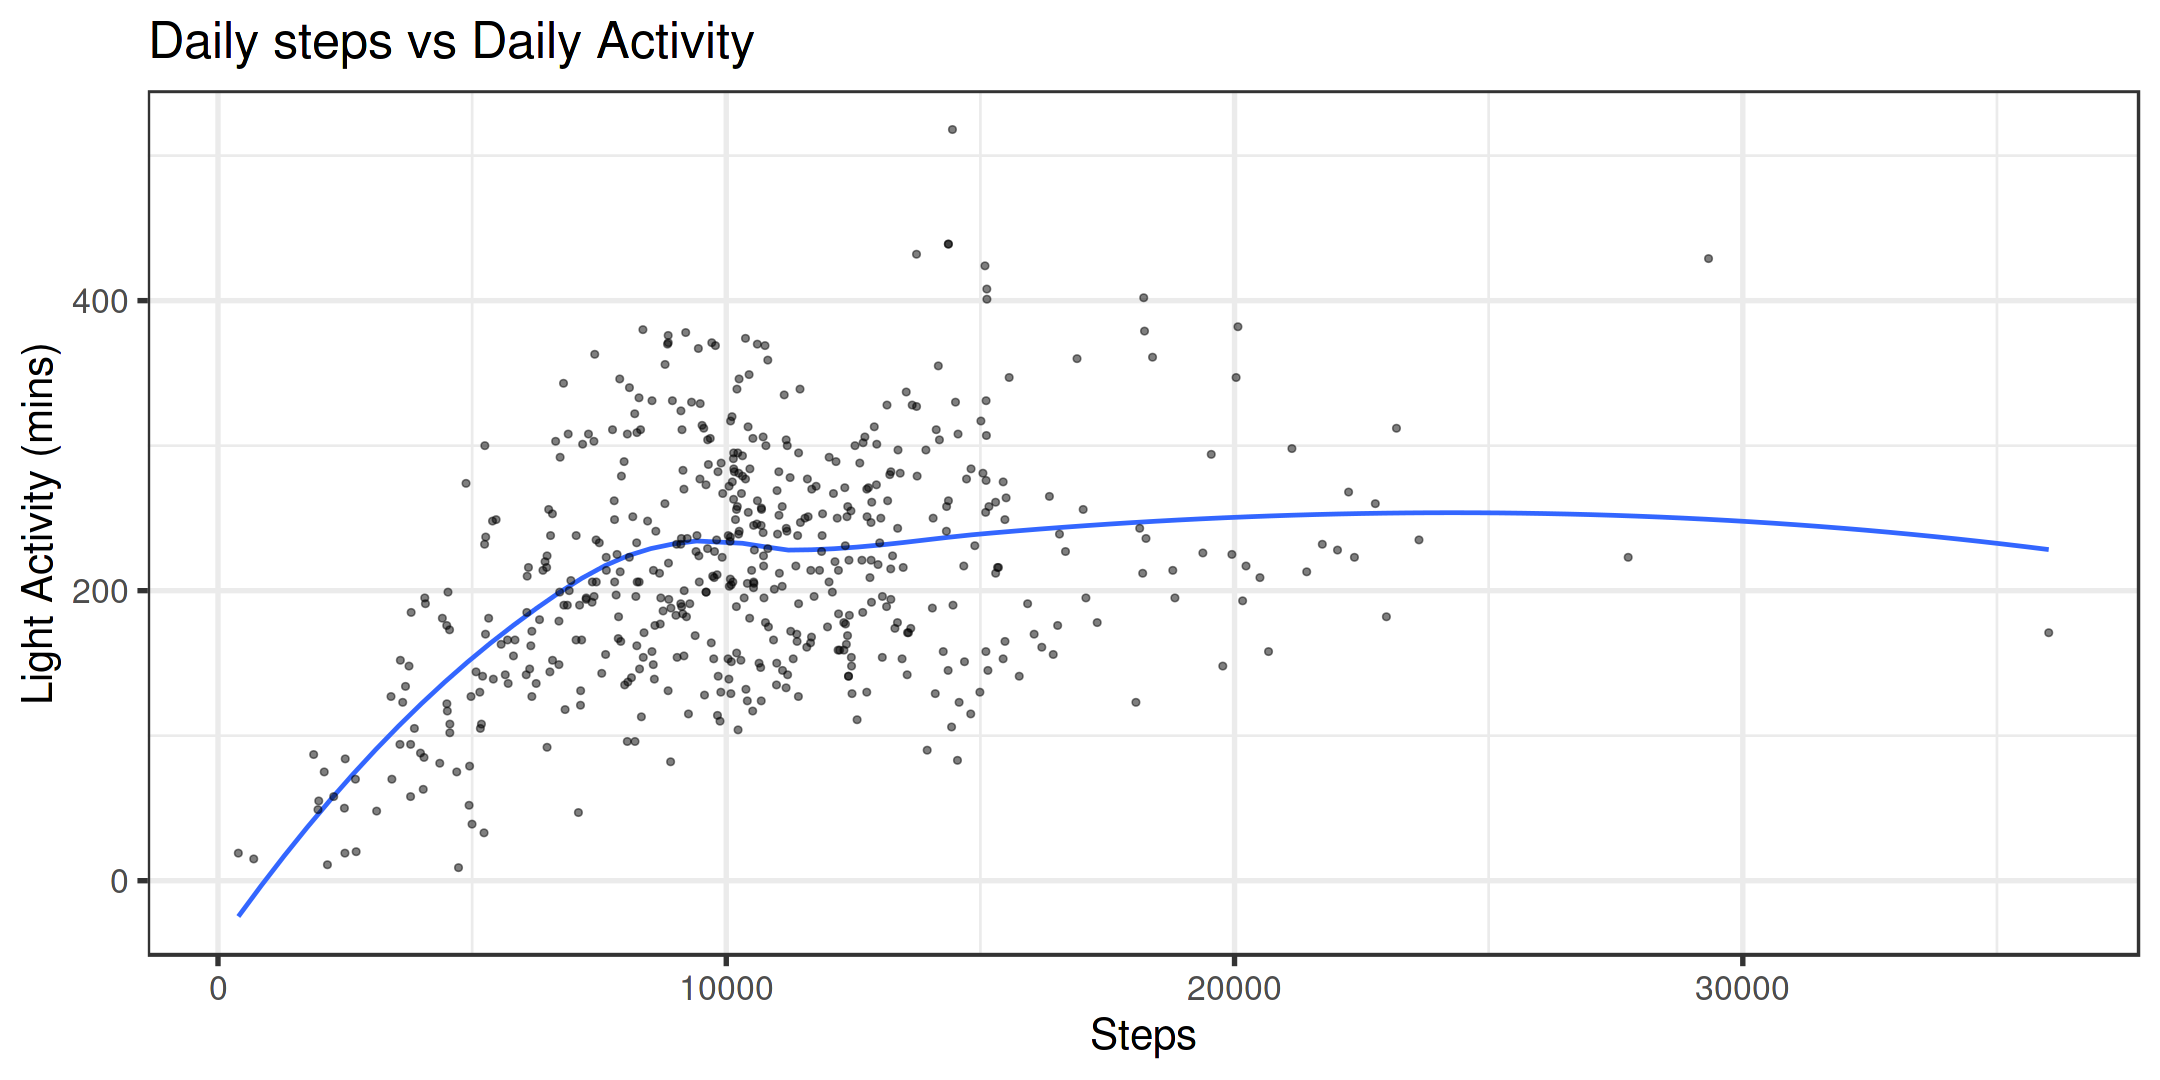

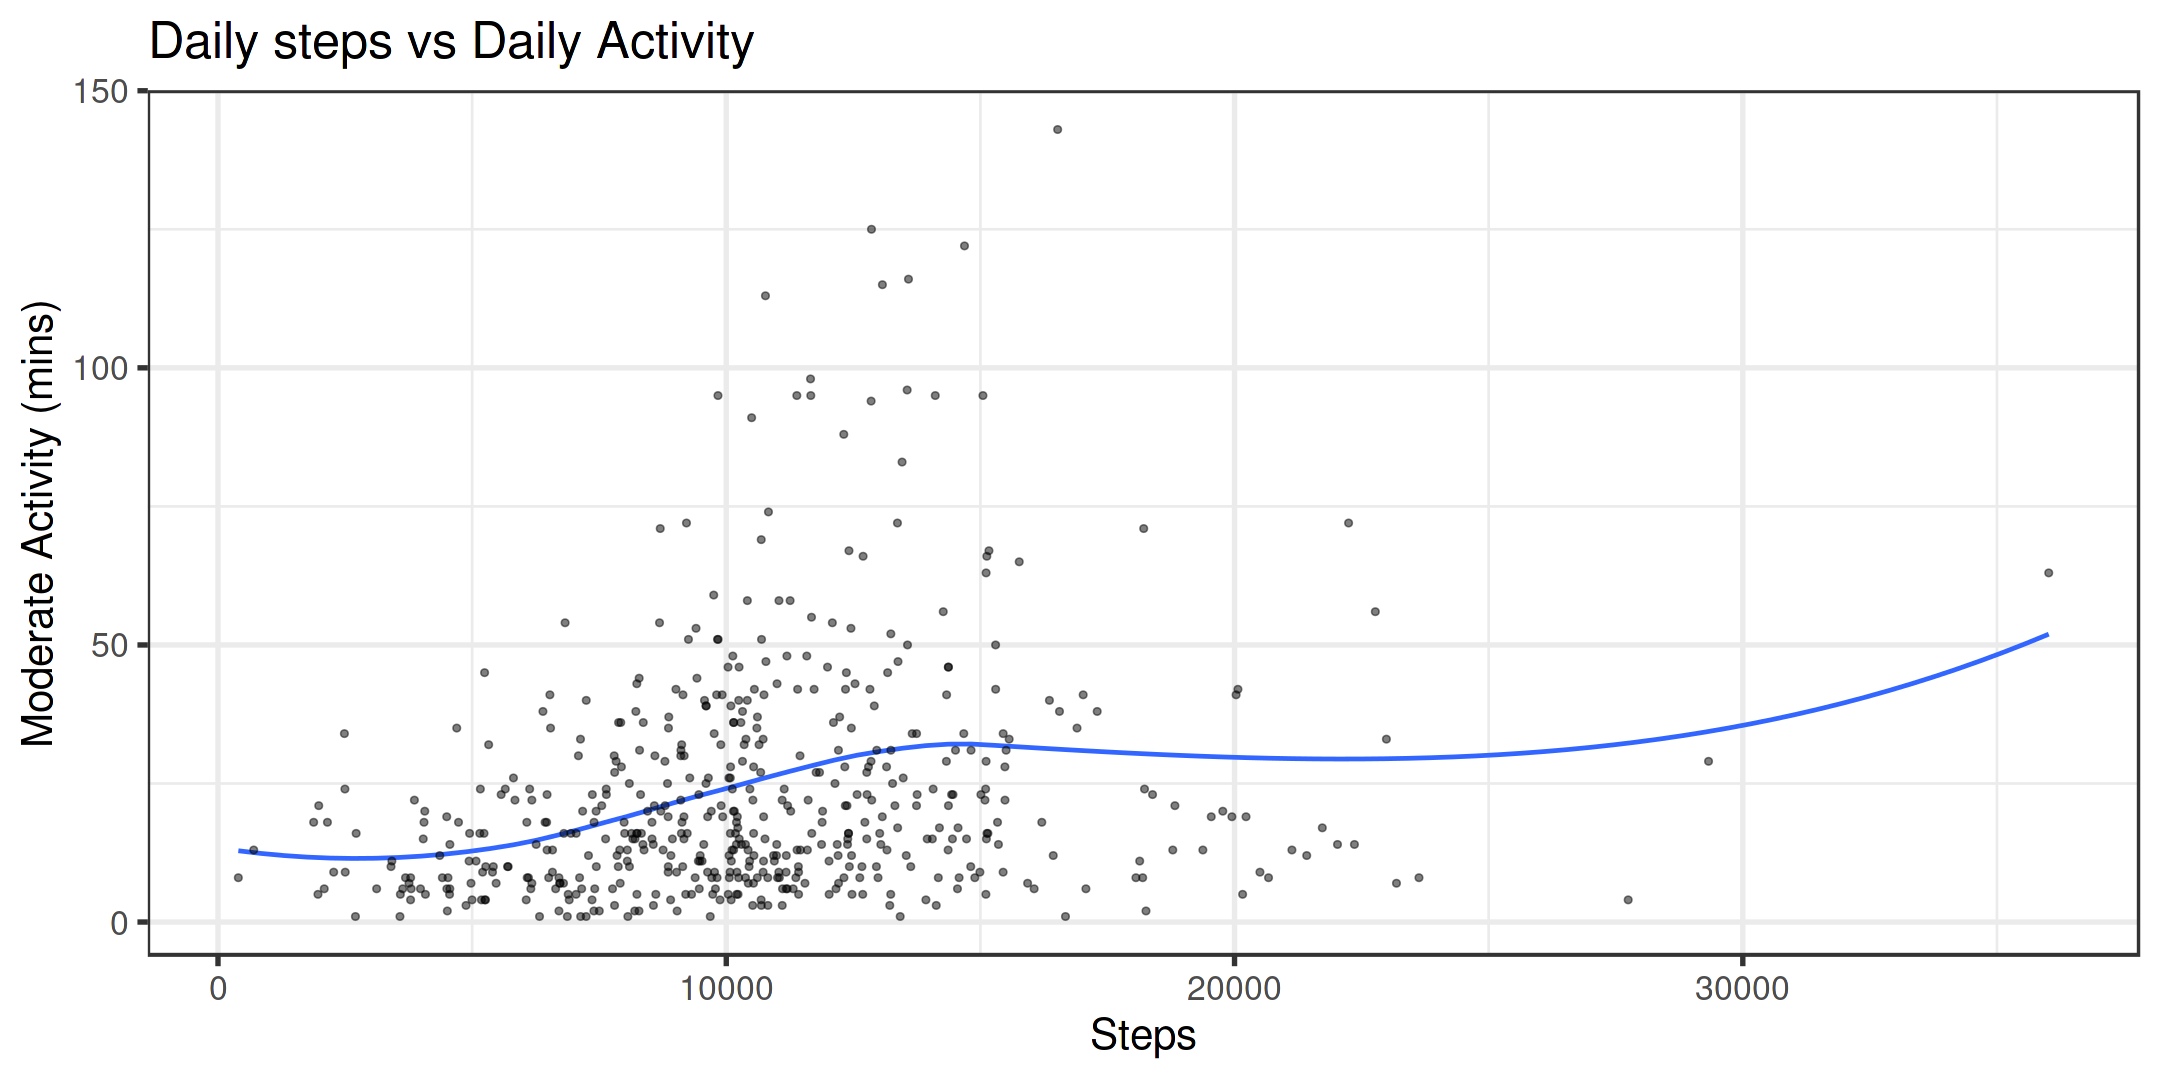

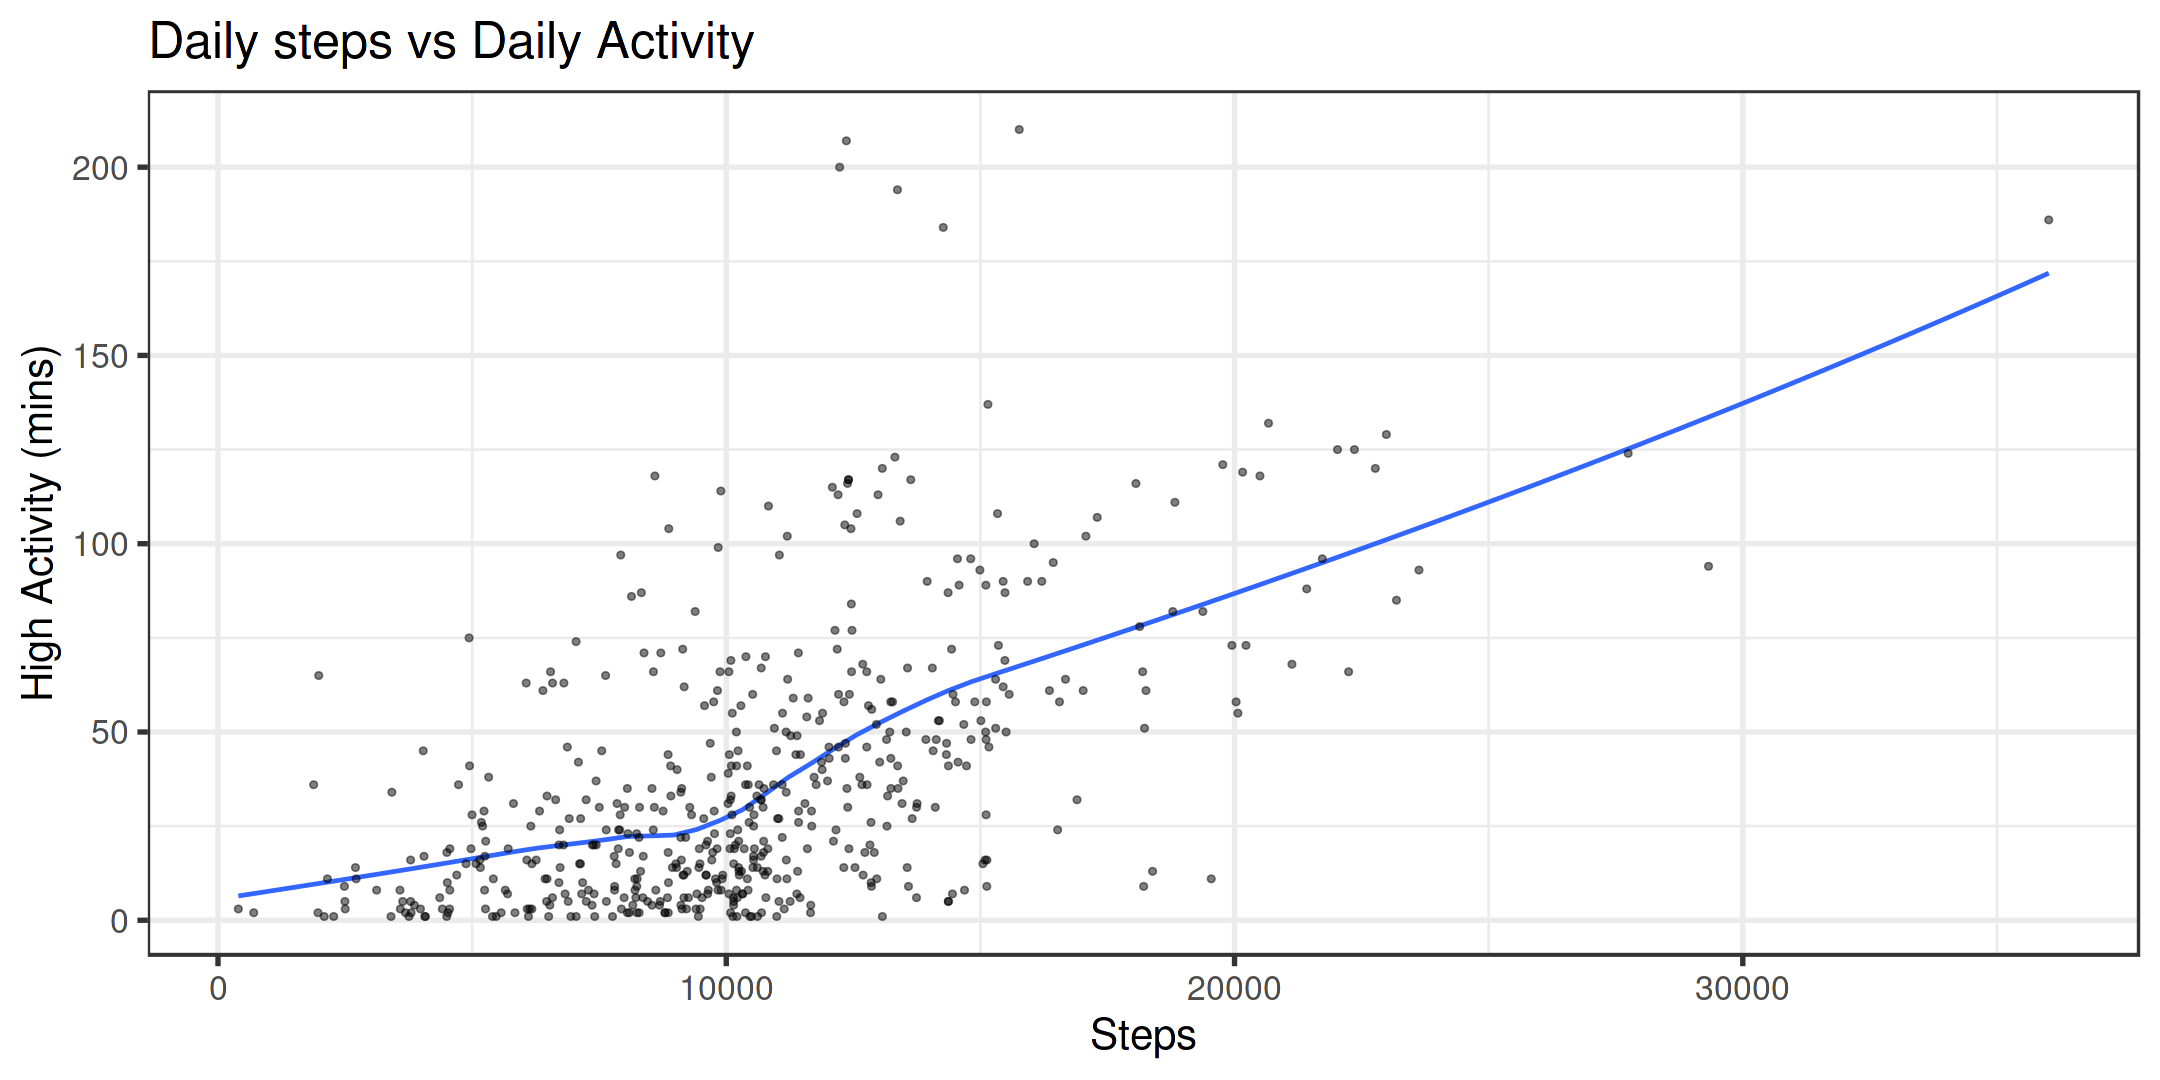

In [8]:
#Selecting only the activity columns
activity_level <- select(fitness_data_merged, TotalSteps, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes)
activity_level[activity_level == 0] <- NA
activity_level <- activity_level[complete.cases(activity_level),]
glimpse(activity_level)

#changing the default size of plot
fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}
fig(18,9)

#Setting theme for all the plot
theme_set(theme_bw(base_size = 25, base_family = "Times"))

#For Light Active Minutes
ggplot(data = activity_level, aes(x = TotalSteps, y = LightlyActiveMinutes)) + 
geom_smooth(formula = y ~ x, method = "loess", se = F) + geom_point(alpha = 0.5) +
labs(title = "Daily steps vs Daily Activity", x = "Steps", y = "Light Activity (mins)")

#For Fairly Active Minutes
ggplot(data = activity_level, aes(x = TotalSteps, y = FairlyActiveMinutes)) + 
geom_smooth(formula = y ~ x, method = "loess", se = F) + geom_point(alpha = 0.5) +
labs(title = "Daily steps vs Daily Activity", x = "Steps", y = "Moderate Activity (mins)")

#For Very Active Minutes
ggplot(data = activity_level, aes(x = TotalSteps, y = VeryActiveMinutes)) + 
geom_smooth(formula = y ~ x, method = "loess", se = F) + geom_point(alpha = 0.5) +
labs(title = "Daily steps vs Daily Activity", x = "Steps", y = "High Activity (mins)")


* *Light activity - Majority users have less than 10000 steps and high activity time.*
* *Moderate & high activity - Majority users have 5000 to 15000 steps and low activity time of less than 50 mins.*
* *Light activity is stable after 10000 steps and 250 mins while high activity have an upward trend after 10000 steps and 25 mins.*

**2.2. Daily steps with calories**

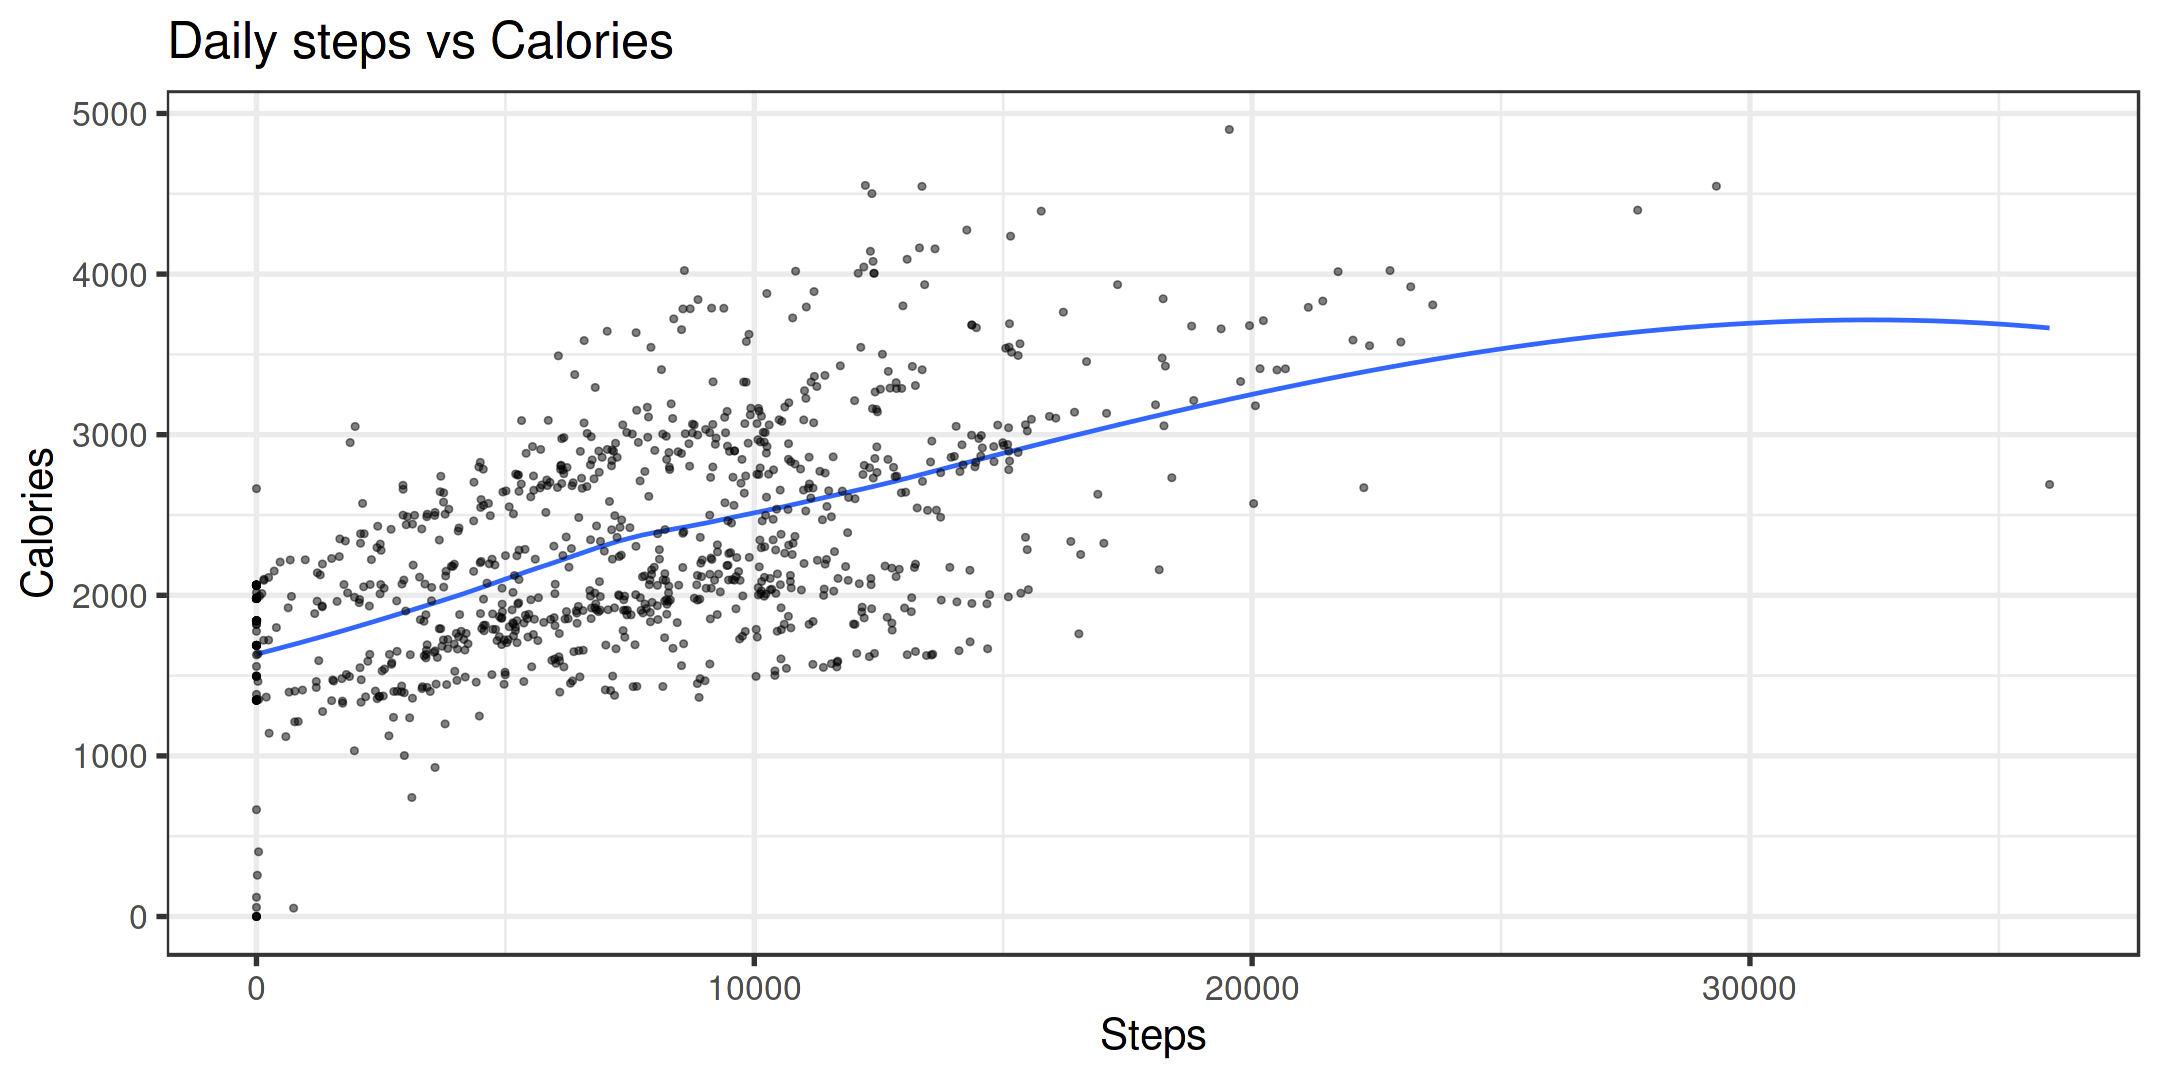

In [9]:
ggplot(data = fitness_data_merged, aes(x = TotalSteps, y = Calories)) + 
geom_smooth(formula = y ~ x, method = "loess", se = F) + geom_point(alpha = 0.5) +
labs(title = "Daily steps vs Calories", x = "Steps", y = "Calories")

*An upward trend, which should definitely happen because steps are directly proportional with calories burned*

**2.3. Comparing the Data of Sleep**

First, checking the data of sleep on bed and total sleep time

Rows: 413
Columns: 4
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ SleepTimeDiff      <int> 19, 23, 30, 27, 12, 16, 17, 39, 23, 19, 46, 29, 27,…


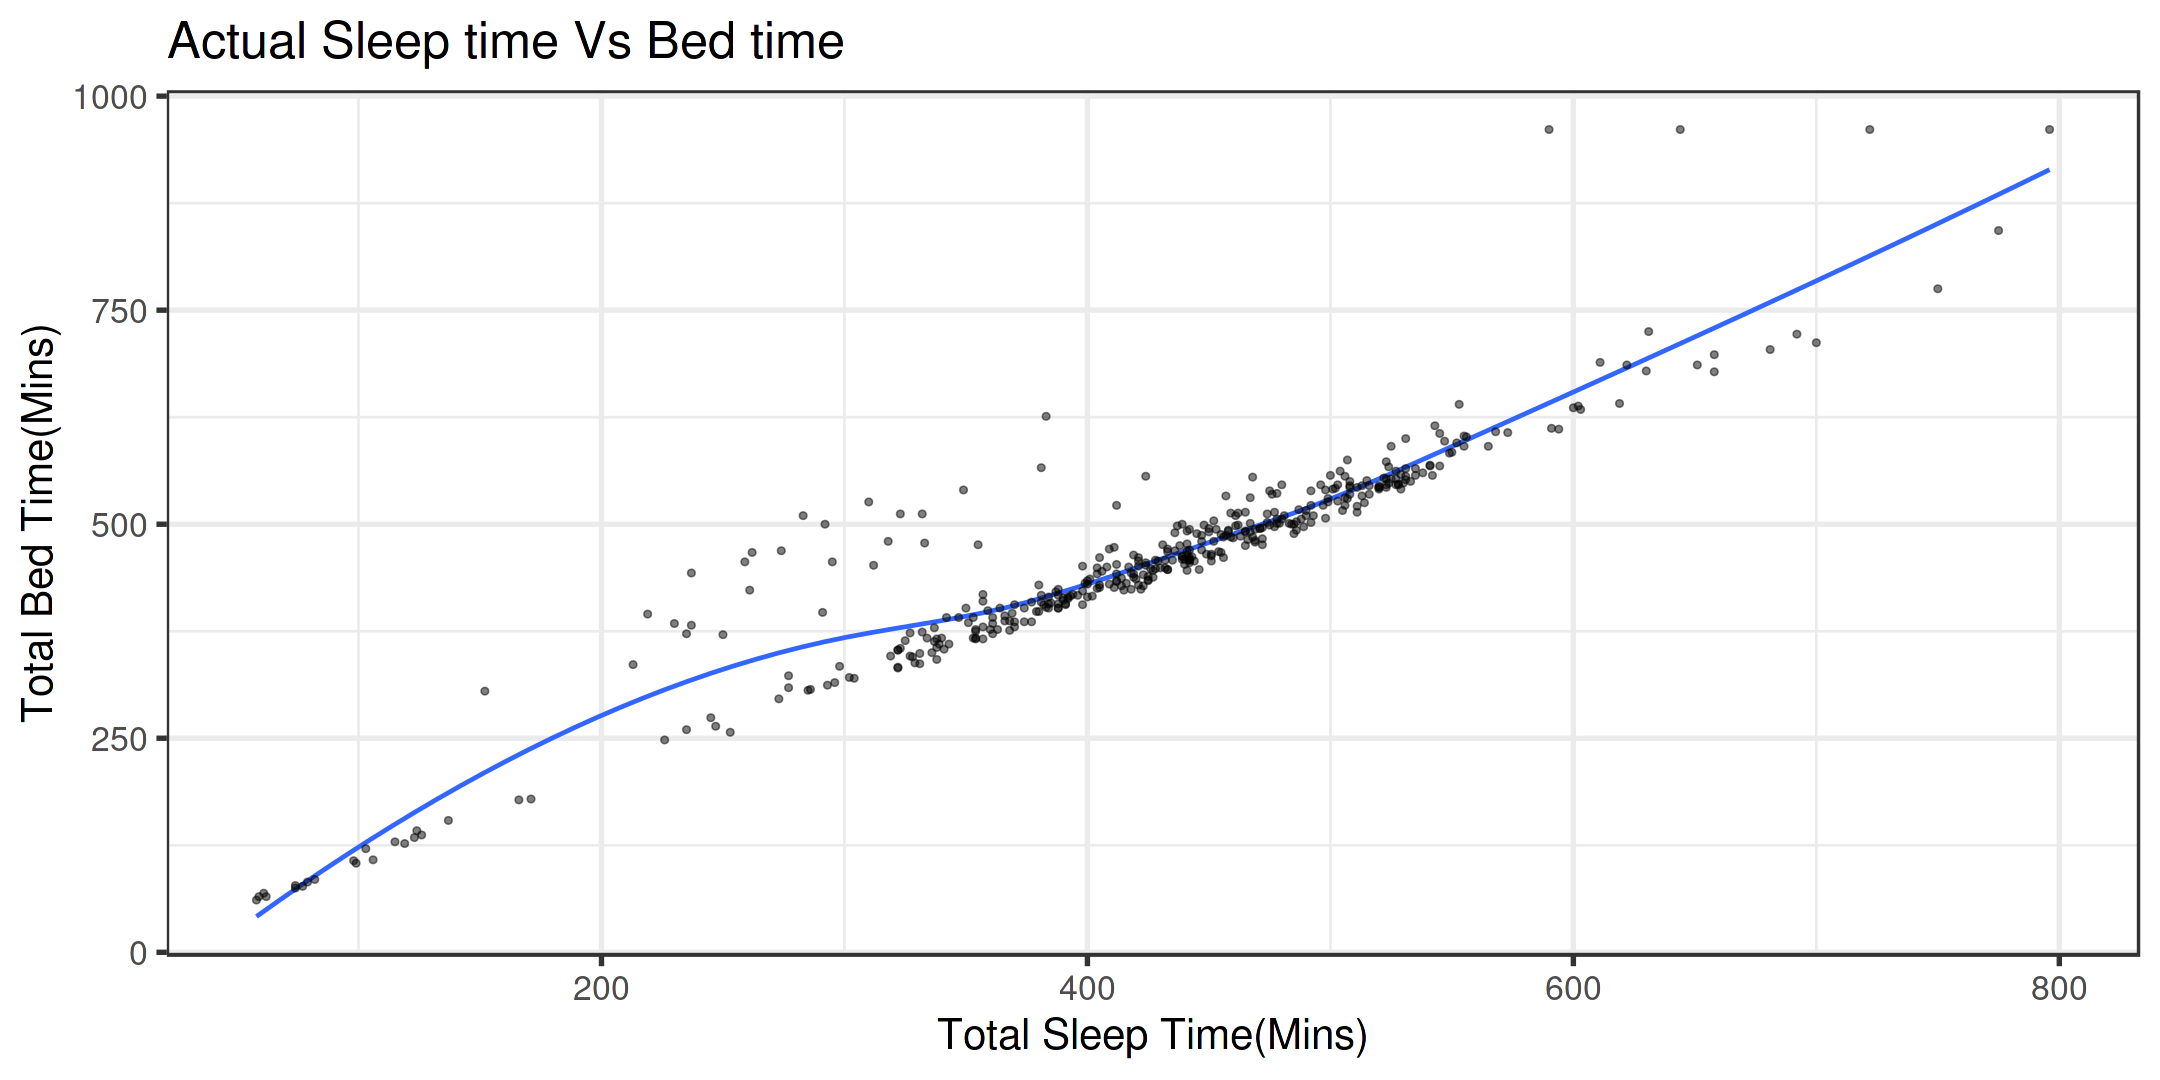

In [10]:
Sleep <- fitness_data_merged %>%
select(Id, TotalMinutesAsleep, TotalTimeInBed) %>%
mutate(SleepTimeDiff = TotalTimeInBed - TotalMinutesAsleep)
Sleep <- na.omit(Sleep)
glimpse(Sleep)

ggplot(data = Sleep, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
geom_smooth(formula = y ~ x, method = "loess", se = F) + geom_point(alpha = 0.5) +
labs(title = "Actual Sleep time Vs Bed time", x = "Total Sleep Time(Mins)", y = "Total Bed Time(Mins)")

* *An upward trend for sleep means that more bed time is spend compared to actual sleep*

Now, let's check the data for the time difference between the bed time and sleep time.

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ SleepTimeDiff      <int> 19, 23, 30, 27, 12, 16, 17, 39, 23, 19, 46, 29, 27,…
$ SleepEfficiency    <fct> Good Time, Bad Time, Bad Time, Bad Time, Good Time,…


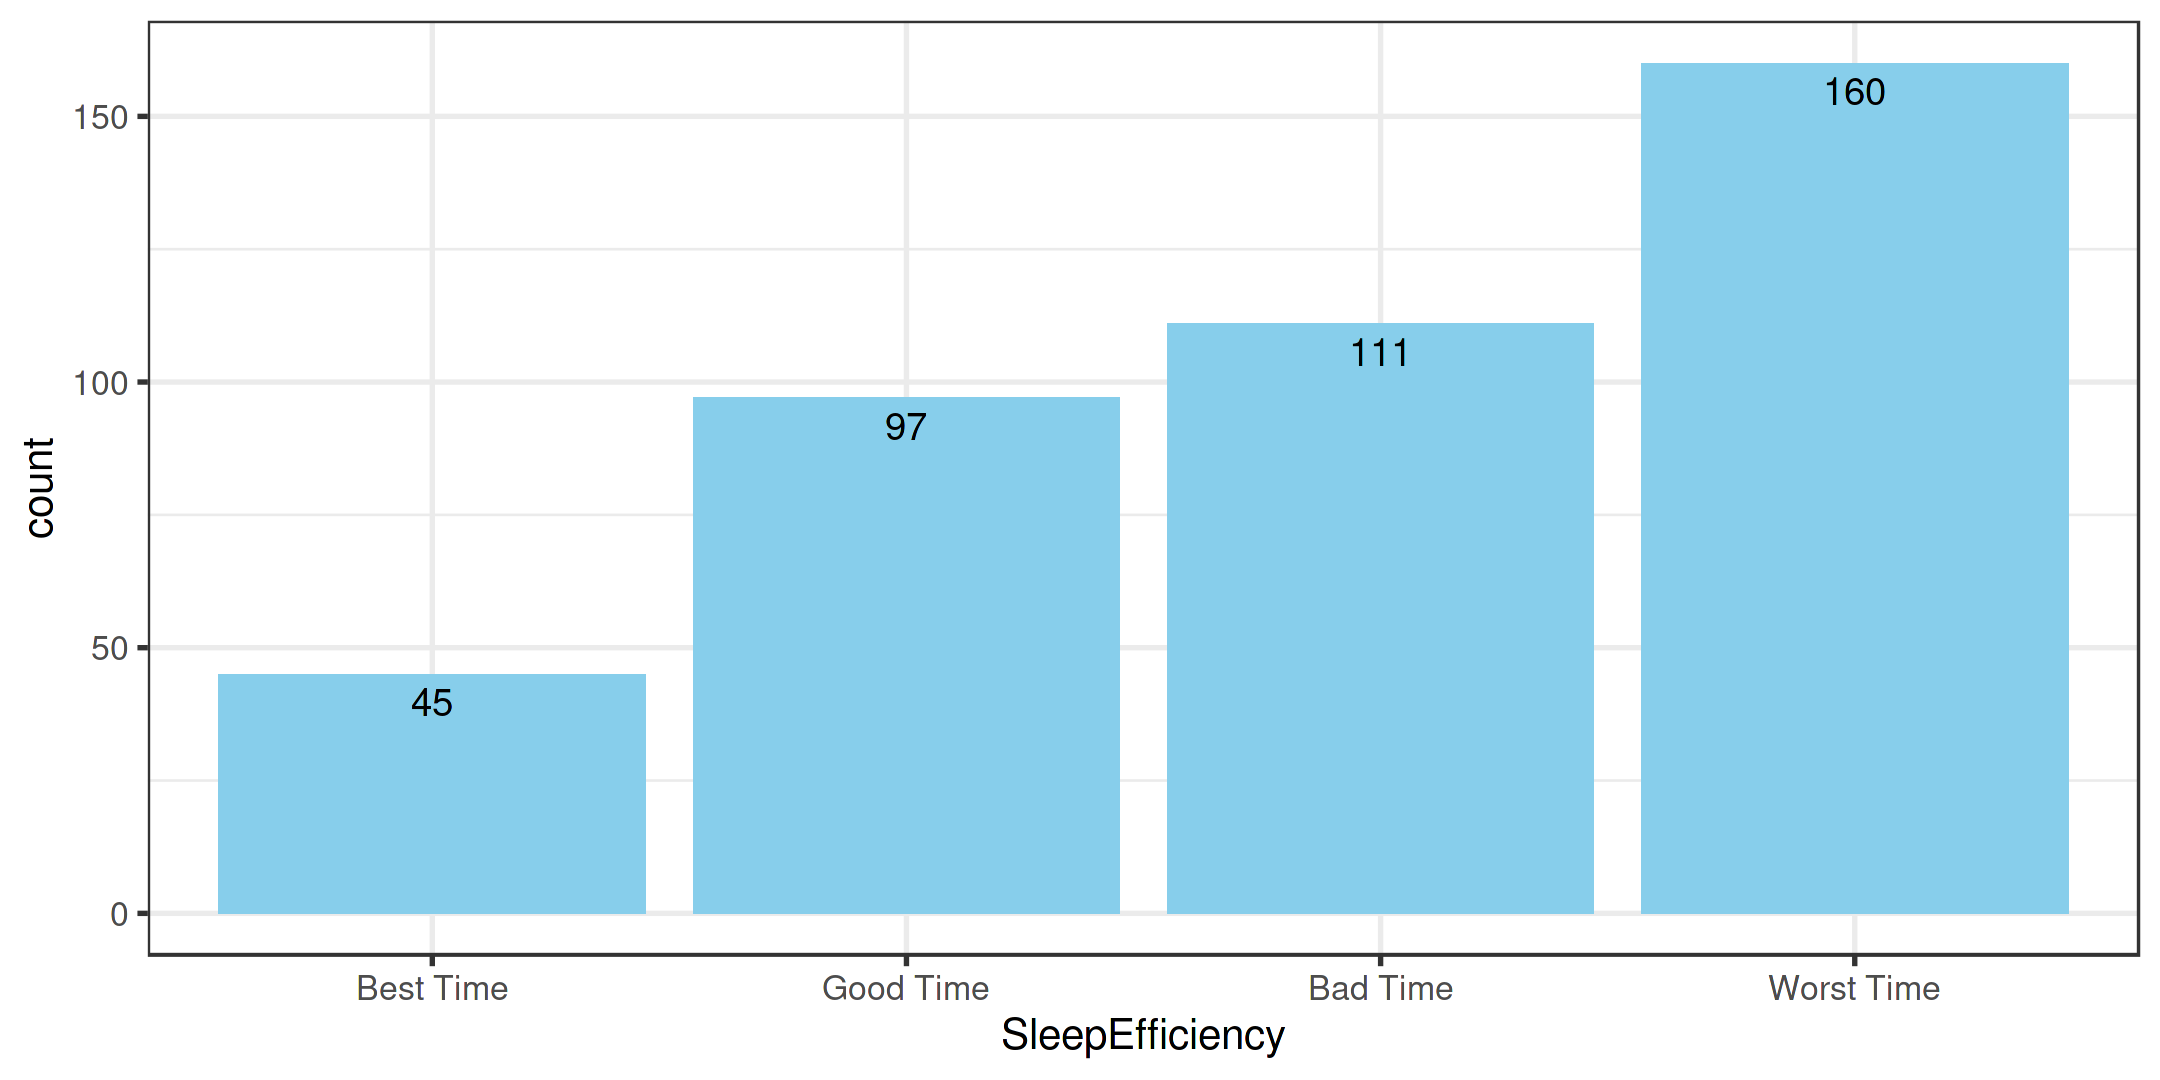

In [11]:
#Creating sleep efficiency as per the National Library of Medicine
Sleep$SleepEfficiency <- factor(ifelse(Sleep$SleepTimeDiff <= 10, "Best Time",
                                ifelse(Sleep$SleepTimeDiff <= 20, "Good Time",
                                ifelse(Sleep$SleepTimeDiff <= 30, "Bad Time", "Worst Time"))), 
                                levels = c("Best Time", "Good Time", "Bad Time", "Worst Time"))
glimpse(Sleep)

#Ploting Pie Chart for the Sleep Efficiency
ggplot(Sleep, aes(x = SleepEfficiency)) +
geom_bar(fill = "sky blue") + 
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, size = 8)

*Very few data on sleep are within the recommended time after lying on the bed, more than 50% of the data are in Bad and Worst Time*

**2.4. Sedentary time analysis**

Rows: 943
Columns: 2
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ SedentaryMinutes <fct> High Risk, High Risk, High Risk, High Risk, High Risk…


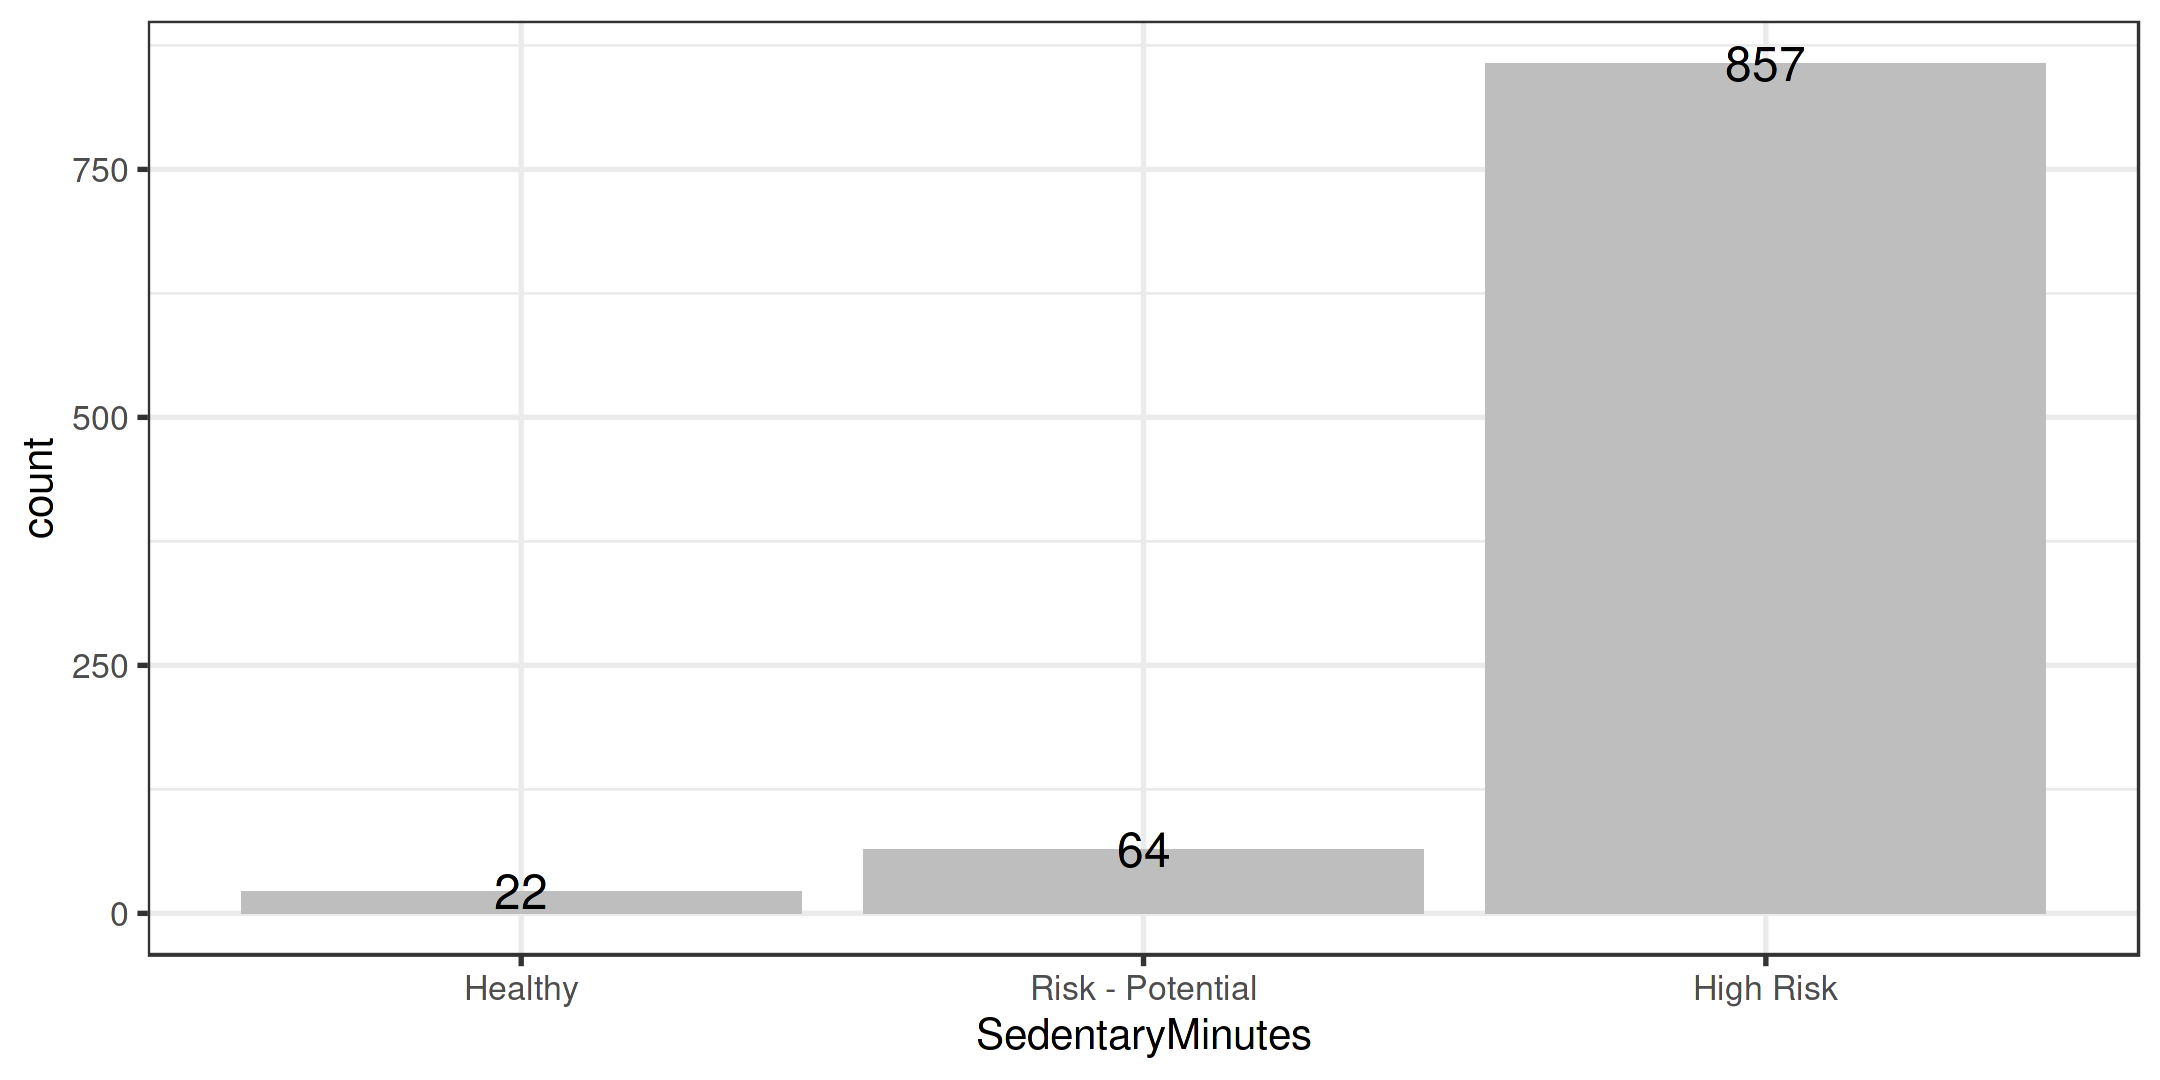

In [12]:
sedentary_data <- fitness_data_merged %>%
select(Id, SedentaryMinutes)

sedentary_data$SedentaryMinutes <- factor(ifelse(sedentary_data$SedentaryMinutes < 450, "Healthy",
                                          ifelse(sedentary_data$SedentaryMinutes < 600, "Risk - Potential", "High Risk")), 
                                          level = c("Healthy", "Risk - Potential", "High Risk"))

glimpse(sedentary_data)

ggplot(data = sedentary_data, aes(x = SedentaryMinutes)) + 
geom_bar(fill = "grey") + 
geom_text(aes(label = ..count..), stat = "count", size = 10)

*This data proves how much sleep data is related with the sedentary data, both have indicated that the users are much prone to health risk with their daily activities.*

# Act Phase

Objective: 1. What are some trends in smart device usage? 2. How could these trends apply to Bellabeat customers? 3. How could these trends help influence Bellabeat marketing strategy?

1. Trends in the smart device usage is related to the daily activities, calories counted and burned, sleep time and bed time, and weight related calculations.

2. All the customers of Bellabeat are women and the study of this data do not have any information on gender, considering this data is not biased we can implement the tracking information as per the recommendation on a standard of womens daily lifestyle. All women do not live a similar lifestyle some work in office and others are into sports or various activities, we can also segregate this in age wise which will display relevant details.

3. The trend can help the marketing strategy in enhancing the application with activities related with calories. Even new functionality can me made like notification and reminders for digital time which can help in sleep and sedentary time. Even some sort of additional strategy can be implemented for users that accomplish different task on different durations.

**Thank you for reading and showing interest in my case study.**